# 36 unicode与字符编码
至此Go语言中最重要也最有特色的概念，语法和编程方式，我们已经都全部学习完了。
先进行一个简单的总结：

## Go语言经典知识总结：
基于混合线程的并发编程模型自然不必多说。

在**数据类型**方面有：

- 基于底层数组的切片；
- 用来传递数据的通道；
- 作为一等类型的函数；
- 可实现面向对象的结构体；
- 能无侵入实现的接口等。

在**语法**方面有：

- 异步编程神器go语句；
- 函数的最后关卡defer语句；
- 可做类型判断的switch语句；
- 多通道操作利器select语句；
- 非常有特色的异常处理函数panic和recover。

除了这些，我们还一起讨论了**测试Go程序**的主要方式。这涉及了Go语言自带的程序测试套件，相关的概念和工具包括：

- 独立的测试源码文件；
- 三种功用不同的测试函数；
- 专用的testing代码包；
- 功能强大的go test命令。

另外，就在前不久，我还为你深入讲解了Go语言提供的那些**同步工具**。它们也是Go语言并发编程工具箱中不可或缺的一部分。这包括了：

- 经典的互斥锁Mutex；
- 读写锁RWMutex；
- 条件变量；
- 原子操作atomic。

以及**Go语言特有的一些数据类型**，即：

- 单次执行小助手sync.Once；
- 临时对象池sync.Pool；
- 帮助我们实现多goroutine协作流程的sync.WaitGroup、context.Context；
- 一种高效的并发安全字典sync.Map。

毫不夸张地说，如果你真正地掌握了上述这些知识，那么就已经获得了Go语言编程的精髓。

在这之后，你再去研读Go语言标准库和那些优秀第三方库中的代码的时候，就一定会事半功倍。同时，在使用Go语言编写软件的时候，你肯定也会如鱼得水、游刃有余的。

我用了大量的篇幅讲解了Go语言中最核心的知识点，真心希望你已经搞懂了这些内容。

**在后面的日子里，我会与你一起去探究Go语言标准库中最常用的那些代码包，弄清它们的用法、了解它们的机理。当然了，我还会顺便讲一讲那些必备的周边知识。**

## 前导内容1：Go语言字符编码基础

首先，让我们来关注字符编码方面的问题。这应该是在计算机软件领域中非常基础的一个问题了。

我在前面说过，Go语言中的标识符可以包含“任何`Unicode`编码可以表示的字母字符”。我还说过，虽然我们可以直接把一个整数值转换为一个`string`类型的值。

但是，被转换的整数值应该可以代表一个有效的`Unicode`代码点，否则转换的结果就将会是"`�`"，即：一个仅由高亮的问号组成的字符串值。

另外，当一个`string`类型的值被转换为`[]rune`类型值的时候，其中的字符串会被拆分成一个一个的`Unicode`字符。

显然，Go语言采用的字符编码方案从属于`Unicode`编码规范。更确切地说，Go语言的代码正是由`Unicode`字符组成的。Go语言的所有源代码，都必须按照`Unicode`编码规范中的UTF-8编码格式进行编码。

换句话说，Go语言的源码文件必须使用UTF-8编码格式进行存储。如果源码文件中出现了`非UTF-8编码`的字符，那么在构建、安装以及运行的时候，go命令就会报告错误“illegal UTF-8 encoding”。

在这里，我们首先要对Unicode编码规范有所了解。不过，在讲述它之前，我先来简要地介绍一下ASCII编码。

## 前导内容2：ASCLL编码

ASCII是英文“American Standard Code for Information Interchange”的缩写，中文译为美国信息交换标准代码。它是由美国国家标准学会（ANSI）制定的单字节字符编码方案，可用于基于文本的数据交换。

它最初是美国的国家标准，后又被国际标准化组织（ISO）定为国际标准，称为ISO 646标准，并适用于所有的拉丁文字字母。

**ASCII编码方案使用单个字节（byte）的二进制数来编码一个字符。标准的ASCII编码用一个字节的最高比特（bit）位作为奇偶校验位，而扩展的ASCII编码则将此位也用于表示字符。ASCII编码支持的可打印字符和控制字符的集合也被叫做ASCII编码集。**

我们所说的Unicode编码规范，实际上是另一个更加通用的、针对书面字符和文本的字符编码标准。它为世界上现存的所有自然语言中的每一个字符，都设定了一个唯一的二进制编码。

它定义了不同自然语言的文本数据在国际间交换的统一方式，并为全球化软件创建了一个重要的基础。

Unicode编码规范以ASCII编码集为出发点，并突破了ASCII只能对拉丁字母进行编码的限制。它不但提供了可以对世界上超过百万的字符进行编码的能力，还支持所有已知的转义序列和控制代码。

我们都知道，在计算机系统的内部，抽象的字符会被编码为整数。这些整数的范围被称为**代码空间**。在代码空间之内，每一个特定的整数都被称为一个代码点。**注意在go语言中用的是utf-8，所以理论上每个字符都有其可以对应的整数 比如20013--‘中’。**

**一个受支持的抽象字符会被映射并分配给某个特定的代码点，反过来讲，一个代码点总是可以被看成一个被编码的字符。**

`Unicode`编码规范通常使用十六进制表示法来表示`Unicode`代码点的整数值，并使用“U+”作为前缀。比如，英文字母字符“a”的Unicode代码点是`U+0061`。在`Unicode`编码规范中，一个字符能且只能由与它对应的那个代码点表示。

Unicode编码规范现在的最新版本是11.0，并会于2019年3月发布12.0版本。而Go语言从1.10版本开始，已经对Unicode的10.0版本提供了全面的支持。对于绝大多数的应用场景来说，这已经完全够用了。

Unicode编码规范提供了三种不同的编码格式，即：`UTF-8、UTF-16和UTF-32`。其中的UTF是UCS Transformation Format的缩写。而UCS又是Universal Character Set的缩写，但也可以代表Unicode Character Set。所以，UTF也可以被翻译为Unicode转换格式。它代表的是**字符与字节序列之间**的转换方式。

在这几种编码格式的名称中，“-”右边的整数的含义是，**以多少个比特位作为一个编码单元**。以UTF-8为例，它会以8个比特，也就是一个字节，作为一个编码单元。并且，它与标准的`ASCII`编码是完全兼容的。也就是说，在[0x00, 0x7F]的范围内，这两种编码表示的字符都是相同的。这也是UTF-8编码格式的一个巨大优势。

UTF-8是一种**可变宽**的编码方案。换句话说，它会用一个或多个字节的二进制数来表示某个字符，最多使用四个字节。比如，对于一个英文字符，它仅用一个字节的二进制数就可以表示，而对于一个中文字符，它需要使用三个字节才能够表示。不论怎样，一个受支持的字符总是可以由UTF-8编码为一个字节序列。以下会简称后者为UTF-8编码值。
解释：20013-[0xE4,0xB8,0xAD]

现在，在你初步地了解了这些知识之后，请认真地思考并回答下面的问题。别担心，我会在后面进一步阐述Unicode、UTF-8以及Go语言对它们的运用。

**问题：一个string类型的值在底层是怎样被表达的？**

**典型回答** 是在底层，一个string类型的值是由一系列相对应的Unicode代码点的UTF-8编码值来表达的。

## 问题解析
在Go语言中，一个`string`类型的值既可以被拆分为一个包含多个字符的序列(他是怎么读的)，也可以被拆分为一个包含多个字节的序列(他是怎么存的)。

前者可以由一个以`rune`为元素类型的切片来表示，而后者则可以由一个以`byte`为元素类型的切片代表。

`rune`是`Go`语言特有的一个基本数据类型，它的一个值就代表一个字符，即：一个`Unicode`字符。

比如，'G'、'o'、'爱'、'好'、'者'代表的就都是一个`Unicode`字符。

我们已经知道，UTF-8编码方案会把一个`Unicode`字符编码为一个长度在[1, 4]范围内的字节序列。所以，一个`rune`类型的值也可以由一个或多个字节来代表。
<pre>type rune = int32</pre>
根据rune类型的声明可知，它实际上就是int32类型的一个别名类型。也就是说，一个rune类型的值会由四个字节宽度的空间来存储。它的存储空间总是能够存下一个UTF-8编码值。

一个rune类型的值在底层其实就是一个UTF-8编码值。前者是（便于我们人类理解的）外部展现，后者是（便于计算机系统理解的）内在表达。

请看下面的代码：
<pre>
str := "Go爱好者"
fmt.Printf("The string: %q\n", str)
fmt.Printf("  => runes(char): %q\n", []rune(str))
fmt.Printf("  => runes(hex): %x\n", []rune(str))
fmt.Printf("  => bytes(hex): [% x]\n", []byte(str))
</pre>
字符串值"Go爱好者"如果被转换为[]rune类型的值的话，其中的每一个字符（不论是英文字符还是中文字符）就都会独立成为一个rune类型的元素值。因此，这段代码打印出的第二行内容就会如下所示：
<pre>  => runes(char): ['G' 'o' '爱' '好' '者']</pre>
又由于，每个rune类型的值在底层都是由一个UTF-8编码值来表达的，所以我们可以换一种方式来展现这个字符序列：
<pre>  => runes(hex): [47 6f 7231 597d 8005]</pre> 注意hex即以十六进制来表示

可以看到，五个十六进制数与五个字符相对应。很明显，前两个十六进制数47和6f代表的整数都比较小，它们分别表示字符'G'和'o'。

因为它们都是英文字符，所以对应的UTF-8编码值用一个字节表达就足够了。一个字节的编码值被转换为整数之后，不会大到哪里去。

而后三个十六进制数7231、597d和8005都相对较大，它们分别表示中文字符'爱'、'好'和'者'。

这些中文字符对应的UTF-8编码值，都需要使用三个字节来表达。所以，这三个数就是把对应的三个字节的编码值，转换为整数后得到的结果。

我们还可以进一步地拆分，把每个字符的UTF-8编码值都拆成相应的字节序列。上述代码中的第五行就是这么做的。它会得到如下的输出：

<pre>  => bytes(hex): [47 6f e7 88 b1 e5 a5 bd e8 80 85]</pre>

这里得到的字节切片比前面的字符切片明显长了很多。这正是因为一个中文字符的UTF-8编码值需要用三个字节来表达。

这个字节切片的前两个元素值与字符切片的前两个元素值是一致的，而在这之后，前者的每三个元素值才对应字符切片中的一个元素值。

注意，对于一个多字节的UTF-8编码值来说，我们可以把它当做一个整体转换为单一的整数，也可以先把它拆成字节序列，再把每个字节分别转换为一个整数，从而得到多个整数。

这两种表示法展现出来的内容往往会很不一样。比如，对于中文字符'爱'来说，它的UTF-8编码值可以展现为单一的整数7231，也可以展现为三个整数，即：e7、88和b1。

总之，一个string类型的值会由若干个Unicode字符组成，每个Unicode字符都可以由一个rune类型的值来承载。

这些字符在底层都会被转换为UTF-8编码值，而这些UTF-8编码值又会以字节序列的形式表达和存储。因此，一个string类型的值在底层就是一个能够表达若干个UTF-8编码值的字节序列。
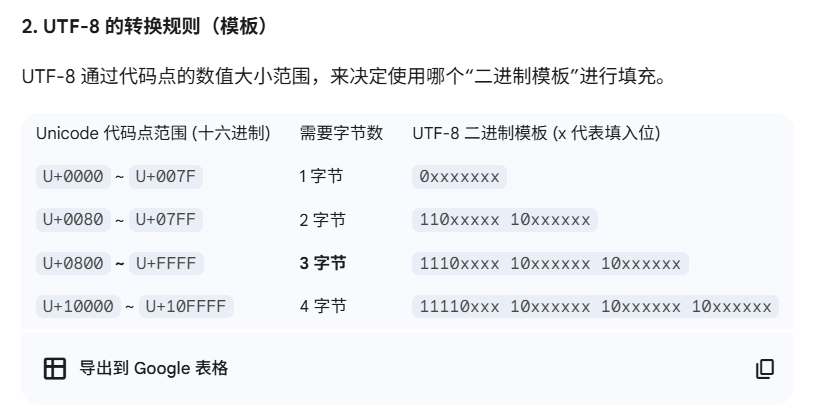
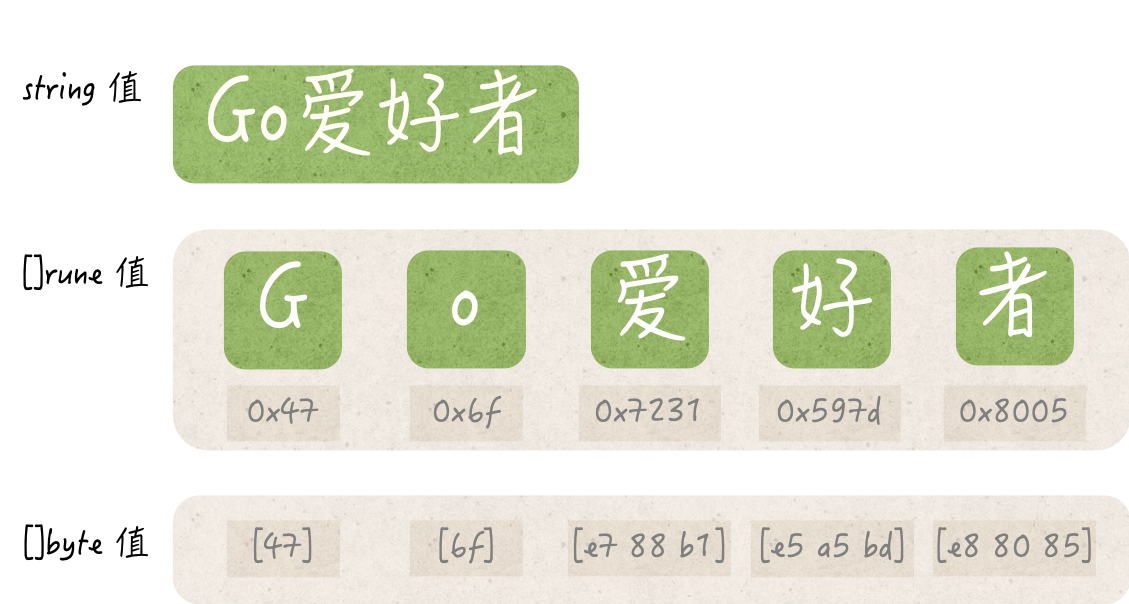
## 知识扩展

**问题 1：使用带有range子句的for语句遍历字符串值的时候应该注意什么？**

带有range子句的for语句会先把被遍历的字符串值拆成一个**字节序列**，然后再试图找出这个字节序列中包含的每一个UTF-8编码值，或者说每一个Unicode字符。

这样的for语句可以为两个迭代变量赋值。如果存在两个迭代变量，那么赋给第一个变量的值，就将会是当前字节序列中的某个UTF-8编码值的**第一个字节**所对应的那个索引值。

而赋给第二个变量的值，则是这个UTF-8编码值代表的那个Unicode字符，其类型会是rune。

例如，有这么几行代码：
<pre>
str := "Go爱好者"
for i, c := range str {
 fmt.Printf("%d: %q [% x]\n", i, c, []byte(string(c)))
}
</pre>

这里被遍历的字符串值是"Go爱好者"。在每次迭代的时候，这段代码都会打印出两个迭代变量的值，以及第二个值的字节序列形式。完整的打印内容如下：

<pre>
0: 'G' [47]
1: 'o' [6f]
2: '爱' [e7 88 b1]
5: '好' [e5 a5 bd]
8: '者' [e8 80 85]
</pre>

第一行内容中的关键信息有0、'G'和[47]。这是由于这个字符串值中的第一个Unicode字符是'G'。该字符是一个单字节字符，并且由相应的字节序列中的第一个字节表达。这个字节的十六进制表示为47。

第二行展示的内容与之类似，即：第二个Unicode字符是'o'，由字节序列中的第二个字节表达，其十六进制表示为6f。

再往下看，第三行展示的是'爱'，也是第三个Unicode字符。因为它是一个中文字符，所以由字节序列中的第三、四、五个字节共同表达，其十六进制表示也不再是单一的整数，而是e7、88和b1组成的序列。

下面要注意了，正是因为'爱'是由三个字节共同表达的，所以第四个Unicode字符'好'对应的索引值并不是3，而是2加3后得到的5。

这里的2代表的是'爱'对应的索引值，而3代表的则是'爱'对应的UTF-8编码值的宽度。对于这个字符串值中的最后一个字符'者'来说也是类似的，因此，它对应的索引值是8。

由此可以看出，这样的for语句可以逐一地迭代出字符串值里的每个Unicode字符。但是，相邻的Unicode字符的**索引值并不一定是连续**的。这取决于前一个Unicode字符是否为单字节字符。

正因为如此，如果我们想得到其中某个Unicode字符对应的UTF-8编码值的宽度，就可以用下一个字符的索引值减去当前字符的索引值。

初学者可能会对for语句的这种行为感到困惑，因为它给予两个迭代变量的值看起来并不总是对应的。不过，一旦我们了解了它的内在机制就会拨云见日、豁然开朗。

## 总结
我们今天把目光聚焦在了Unicode编码规范、UTF-8编码格式，以及Go语言对字符串和字符的相关处理方式上。

Go语言的代码是由Unicode字符组成的，它们都必须由Unicode编码规范中的UTF-8编码格式进行编码并存储，否则就会导致go命令的报错。

Unicode编码规范中的编码格式定义的是：**字符与字节序列之间的转换方式。其中的UTF-8是一种可变宽的编码方案。**

它会用一个或多个字节的二进制数来表示某个字符，最多使用四个字节。一个受支持的字符，总是可以由UTF-8编码为一个字节序列，后者也可以被称为UTF-8编码值。

Go语言中的一个string类型值会由若干个Unicode字符组成，每个Unicode字符都可以由一个rune类型的值来承载。

这些字符在底层都会被转换为UTF-8编码值，而这些UTF-8编码值又会以字节序列的形式表达和存储。因此，一个string类型的值在底层就是一个能够表达若干个UTF-8编码值的字节序列。

初学者可能会对带有range子句的for语句遍历字符串值的行为感到困惑，因为它给予两个迭代变量的值看起来并不总是对应的。但事实并非如此。

这样的for语句会先把被遍历的字符串值拆成一个字节序列，然后再试图找出这个字节序列中包含的每一个UTF-8编码值，或者说每一个Unicode字符。

相邻的Unicode字符的索引值并不一定是连续的。这取决于前一个Unicode字符是否为**单字节字符**。一旦我们清楚了这些内在机制就不会再困惑了。

对于Go语言来说，Unicode编码规范和UTF-8编码格式算是基础之一了。我们应该了解到它们对Go语言的重要性。这对于正确理解Go语言中的相关数据类型以及日后的相关程序编写都会很有好处。

**字符序列VS字节序列**

## 思考题
今天的思考题是：判断一个Unicode字符是否为单字节字符通常有几种方式？
1.直接用[]byte(str)输出，然后读取长度
2.利用range看后面的差值是不是1

`unicode/utf8代码包中有几个可以做此判断的函数，比如：RuneLen函数、EncodeRune函数等。我们需要根据输入的不同来选择和使用它们。具体可以查看该代码包的文档。`